In [1]:
#### Exploratory Data Analysis
#1. Distribution of Male and Female
# - Bar Chart
# - Pie Chart
#2. What Distribution of size of all Images
# - Histogram
# - Box Plot
# - Split by "Gender"
#3. Make the decision of width & height to resize using above chart.
#4. Remove the few images that are have very less size

In [2]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------- ------------------------------- 61.4/294.9 kB 1.1 MB/s eta 0:00:01
   -------------------- ------------------- 153.6/294.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#computer vision library
import cv2

# glob
from glob import glob

In [5]:
# extract path of male and female in crop_data folder and put them in a list
fpath = glob('./crop_data/female/*.jpg')
mpath = glob('./crop_data/male/*.jpg')

In [6]:
df_female = pd.DataFrame(fpath,columns=['filepath'])
df_female['gender'] = 'female'

df_male = pd.DataFrame(mpath,columns=['filepath'])
df_male['gender'] = 'male'

df = pd.concat((df_female,df_male),axis=0)

df.head()

,filepath,gender
0,./crop_data/female\female_0.jpg,female
1,./crop_data/female\female_1.jpg,female
2,./crop_data/female\female_100.jpg,female
3,./crop_data/female\female_1002.jpg,female
4,./crop_data/female\female_1005.jpg,female


In [7]:
df.shape

(4761, 2)

In [9]:
# it will take each image path
# then return the width of the image
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

In [10]:
df['dimension'] = df['filepath'].apply(get_size) # store dimension of image in this column

In [25]:
df.head()

,filepath,gender,dimension
0,./crop_data/female\female_0.jpg,female,273
1,./crop_data/female\female_1.jpg,female,182
2,./crop_data/female\female_100.jpg,female,122
3,./crop_data/female\female_1002.jpg,female,122
4,./crop_data/female\female_1005.jpg,female,182


In [12]:
dist_gender = df['gender'].value_counts()
dist_gender

gender
female    2586
male      2175
Name: count, dtype: int64

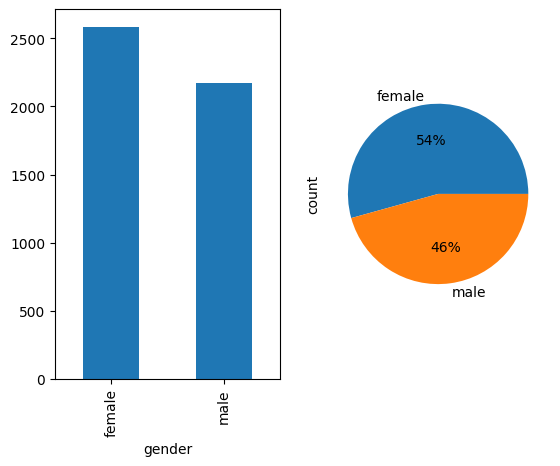

In [26]:
fig,ax = plt.subplots(nrows=1, ncols=2)
dist_gender.plot(kind='bar',ax=ax[0])
dist_gender.plot(kind='pie',ax=ax[1],autopct='%0.0f%%')
plt.show()

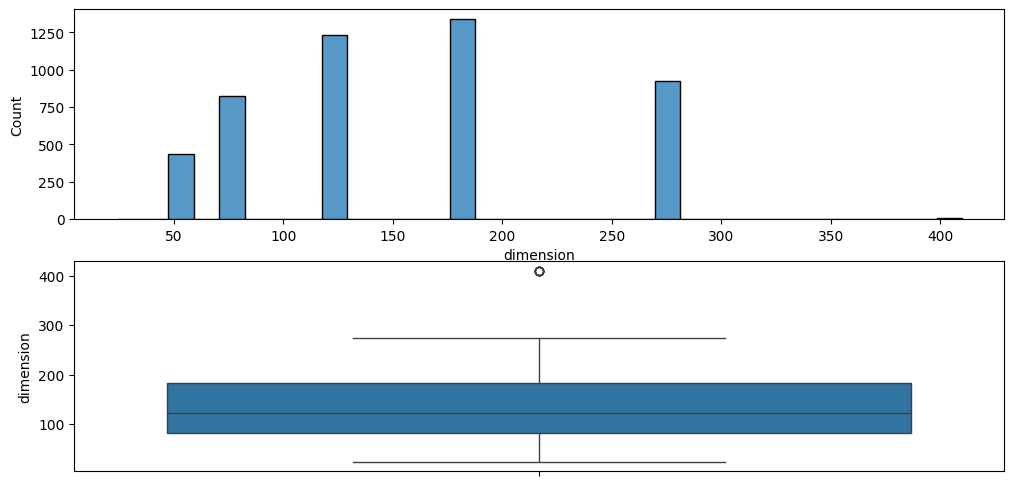

In [27]:
# What's the distribution for all image sizes
# Histogram
# Box plot
# Split by "Gender"
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.histplot(df['dimension'])
plt.subplot(2,1,2)
sns.boxplot(df['dimension'])
plt.show()

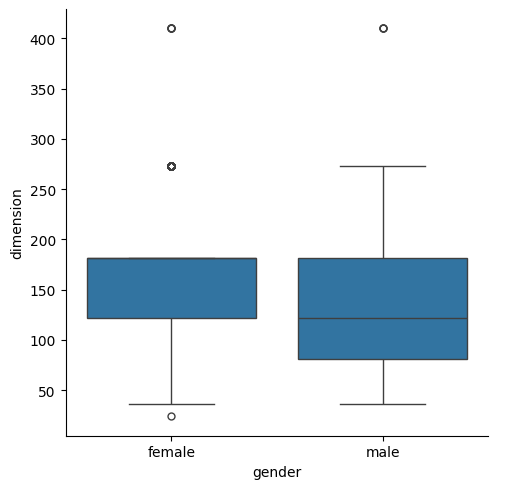

In [31]:
sns.catplot(data=df,x='gender',y='dimension',kind='box')

In [ ]:
# 1. We have almost equal distribution of gender (numbers)
# 2. Most of the images are having dimension more than 60
# 3. Female most of the female images are HD compare to male images

##Consider the images with dimensions more than 60
##Resize all the images into 100 x 100